<a href="https://colab.research.google.com/github/Viny2030/colabs/blob/main/Lazy_Frames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<font color="#07a8ed">API lazy VS API eager**

In [1]:
!pip install polars -U  ## instalacion de polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0


In [2]:
!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com  ## instalacion de extra de nvidia para procesos

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of cudf-polars-cu12 to determine which version is compatible with other requirements. This could take a while.
  Using cached polars-1.12.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.5/32.5 MB 60.4 MB/s eta 0:00:00
  Created wheel for cudf-polars-cu12: filename=cudf_polars_cu12-24.10.1-py3-none-any.whl size=53357 sha256=3aeb03d20bbf944106c86e22714437316148c86f659d9e691bf2a11cccbae8f5
  Stored in directory: /root/.cache/pip/wheels/0b/60/a0/e6aa0053e52d34019bf87cb78f0215e71499afd0ca060b43f5
Successfully built cudf-polars-cu12
  Attempting uninstall: polars
    Found existing installation: polars 1.12.0
    Uninstalling polars-1.12.0:
      Successfully uninstalled polar

In [3]:
import polars as pl  ## importar polars

In [4]:
import polars as col  ## importar modulo columnas

In [5]:
%%time
casas = pl.read_csv("https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv")
casas   ### carga de dataset eager de polars

CPU times: user 12.9 ms, sys: 4.2 ms, total: 17.1 ms
Wall time: 272 ms


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [6]:
casas.columns  ## descripcion de columnas del df casas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [7]:
casas_filtrado = casas.filter(pl.col('antiguedad')>10)  ## filtrado de casas por antiguedad mayor a 10 años
casas_filtrado

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
5,120000,0.68,31,14000,1152,22,4,1.0,8,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
6,153000,0.4,33,23300,2752,51,4,1.5,8,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1722,249000,0.43,41,45800,2426,61,4,2.0,7,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [8]:
casas_agregado = casas_filtrado.group_by('precio').agg(media_precios=pl.col('precio').mean()
)
casas_agregado  ### agrupo por precios y creo columna media precios en el group_by

precio,media_precios
i64,f64
227000,227000.0
399000,399000.0
249000,249000.0
183855,183855.0
178500,178500.0
…,…
196900,196900.0
65720,65720.0
264000,264000.0



# **<font color="#07a8ed">Optimizaciones realizadas con el API Lazy**



In [9]:
%%time
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('antiguedad')>10)
    .group_by('precio').agg(media_precio=pl.col('precio').mean()
    )
)
casas_agregado = query.collect()

CPU times: user 10.5 ms, sys: 18.3 ms, total: 28.9 ms
Wall time: 169 ms



# **<font color="#07a8ed">Cuando usar Lazy o Eager**


In [10]:
casas_agregado ## dataset eager agrupado por precio y media precio

precio,media_precio
i64,f64
224000,224000.0
143500,143500.0
134800,134800.0
104900,104900.0
234000,234000.0
…,…
399000,399000.0
155000,155000.0
210500,210500.0


In [11]:
print(query.explain(streaming=True))  ## imprimir la query como lazy frame explicado

STREAMING:
  AGGREGATE
  	[col("precio").mean().alias("media_precio")] BY [col("precio")] FROM
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT 2/16 COLUMNS
    SELECTION: [(col("antiguedad")) > (10)]


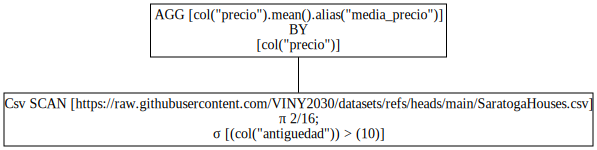

In [12]:
query.show_graph(optimized=True)  ##  observo el show graph con el detalle del lazy frame


# **<font color="#07a8ed">Uso de la consulta Lazy a partir de la lectura de un archivo**

In [13]:

query_2 = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('universitarios') > 40)  # Move filter before select
    .select(
        pl.col('precio_terreno').mean().over('precio_terreno')
    )
)  ## descargo y filtro el datset por universitarios mayores a 40 y precio terreno con el valor de la media sobre el precio del terreno

query_2

In [92]:
print(query_2.explain(streaming=True))  ## imprimo el lazy plan

 SELECT [col("precio_terreno").mean().over([col("precio_terreno")])] FROM
  STREAMING:
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT 2/16 COLUMNS
    SELECTION: [(col("universitarios")) > (40)]


##En esta consulta le decimos a Polars que queremos:

##Cargar datos desde el archivo csv
##Realizar filtro univeristarios mayores a 40
##convertir la columna precio_terreno en la media
##La consulta lazy no se ejecutará en este momento a menos que le apliquemos un .collect() .

In [15]:
query_2.collect()  ## imprimimos la consulta lazy a traves del metodo collect()

precio_terreno
f64
22300.0
7300.0
18700.0
15000.0
23300.0
…
24200.0
36200.0
20400.0



# **<font color="#07a8ed">Uso de la API lazy desde un DataFrame**

###Una forma alternativa de acceder a la API lazy es llamar a .lazy en un DataFrame que ya se ha creado en la memoria.

###Al llamar a .lazy convertimos el DataFrame en un LazyFrame.

In [93]:
df = pl.DataFrame(
    {
        'id': [1, 2, 3],
        'nombre': ['Rosa', 'Ana', 'Pedro']
    }
)

df  ## cargp dataframe eager

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""


In [17]:
df_lazy = df.lazy() ## conversion del dataset eager a dataset lazy

In [18]:
df_lazy  ## detalle dataset lazy

In [19]:
df_lazy.collect()## con el metodo collect el detalle del dataset lazy

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""



# **<font color="#07a8ed">Schema**

###El esquema de un DataFrame o un LazyFrame establece los nombres de las columnas y sus tipos de datos. Si recordamos podemos ver el esquema de un DataFrame o un LazyFrame con el método .schema.

In [20]:
df.schema  ## el schema nos brinda las columnas y los tipos de datos de ellas

Schema([('id', Int64), ('nombre', String)])

In [21]:
df_lazy.schema  ## el schema en un lazy frame

<ipython-input-21-13d88cbe9906>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df_lazy.schema  ## el schema en un lazy frame


Schema([('id', Int64), ('nombre', String)])


# **<font color="#07a8ed">Comprobación de tipos de datos en la API lazy**

##El esquema juega un papel importante en la API lazy.

##Una ventaja de la API lazy es que Polars comprobará el esquema antes de procesar cualquier dato. Esta verificación ocurre cuando ejecutamos nuestra consulta lazy.

##Vemos cómo funciona esto en el siguiente ejemplo donde llamamos a la expresión .round en la columna id del DataFrame que previamente hemos creado.El esquema juega un papel importante en la API lazy.

##Una ventaja de la API lazy es que Polars comprobará el esquema antes de procesar cualquier dato. Esta verificación ocurre cuando ejecutamos nuestra consulta lazy.

##Vemos cómo funciona esto en el siguiente ejemplo donde llamamos a la expresión .round en la columna id del DataFrame que previamente hemos creado.

In [22]:
df_lazy.with_columns(pl.col('id').round(0)).collect()  ### redondeo columna id en o decimales

id,nombre
i64,str
1,"""Rosa"""
2,"""Ana"""
3,"""Pedro"""


###Los que ha sucedido es que la expresión .round solo es válida para columnas de tipo float. Llamar a .round en una columna de números enteros significa que la operación generará un error de tipo InvalidOperationError cuando evaluemos la consulta con collect. Esta verificación de esquema ocurre antes de que se procesen los datos cuando llamamos a collect.


# **<font color="#07a8ed">Manejo de operaciones no disponibles en la API lazy**

In [23]:
casas.columns  ## detalle de columnas en dataset casas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [94]:
lazy_eager_query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(
        pl.col("antiguedad").cast(pl.Int64) # Convert 'antiguedad' to Int64
    )
    .collect()
    .pivot(
        index='antiguedad',
        columns='calefaccion',
        values='habitaciones',
        aggregate_function='mean'
    )
)  ## cargue dataset eager con filtro columna antiguedad convertir la variable a Int64
### el pivoteo no funciono



<ipython-input-94-c7cb8ad8e850>:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')


In [95]:
lazy_eager_query  ## detalle lazy_eager_query

antiguedad,electric,hot water/steam,hot air
i64,f64,f64,f64
42,5.0,7.0,6.5
0,null,7.0,8.765432
133,null,9.5,null
13,6.666667,8.75,7.068966
31,null,7.5,7.076923
…,…,…,…
155,null,3.0,null
149,null,null,8.0
106,null,null,7.0


In [97]:
lazy_eager_query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(
        pl.col("antiguedad").cast(pl.Int64) # Convert 'antiguedad' to Int64
    )
    .collect()
    .pivot(  ## no me pivotea el ai se convierte en lazy frame
        index='antiguedad',
        columns='calefaccion',
        values='habitaciones',
        aggregate_function='mean'
    )
    .lazy()
)

<ipython-input-97-b1a14527c372>:2: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')


In [98]:
print(lazy_eager_query.collect()) ##leo el dataframe lazy con collect()

shape: (136, 4)
┌────────────┬──────────┬─────────────────┬──────────┐
│ antiguedad ┆ electric ┆ hot water/steam ┆ hot air  │
│ ---        ┆ ---      ┆ ---             ┆ ---      │
│ i64        ┆ f64      ┆ f64             ┆ f64      │
╞════════════╪══════════╪═════════════════╪══════════╡
│ 42         ┆ 5.0      ┆ 7.0             ┆ 6.5      │
│ 0          ┆ null     ┆ 7.0             ┆ 8.765432 │
│ 133        ┆ null     ┆ 9.5             ┆ null     │
│ 13         ┆ 6.666667 ┆ 8.75            ┆ 7.068966 │
│ 31         ┆ null     ┆ 7.5             ┆ 7.076923 │
│ …          ┆ …        ┆ …               ┆ …        │
│ 155        ┆ null     ┆ 3.0             ┆ null     │
│ 149        ┆ null     ┆ null            ┆ 8.0      │
│ 106        ┆ null     ┆ null            ┆ 7.0      │
│ 176        ┆ null     ┆ 12.0            ┆ null     │
│ 86         ┆ null     ┆ null            ┆ 6.0      │
└────────────┴──────────┴─────────────────┴──────────┘



# **<font color="#07a8ed">Pan de ejecucion de una consulta en la  API lazy**

# Plan de consulta
#Para cualquier consulta lazy, Polars tiene ambos:

#Un plan no optimizado: este contiene el conjunto de pasos en código qu ele proporcionamos.
#Un plan optimizado: que contiene cambios realizados por el optimizador de consultas


In [99]:
casas.columns  ## columnas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [100]:

query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .filter(pl.col('antiguedad') > 10)  ## filtra por antiguedad mayor a 10 años
    .group_by('precio')
    .agg(media_precio=pl.col('precio').mean(),
         media_habitaciones=pl.col('habitaciones').mean()) # Calcula la media de las habitaciones dentro del grupo
    )

In [104]:
query.collect()  ## consulta lazy

precio,media_precio,media_habitaciones
i64,f64,f64
100000,100000.0,4.75
159400,159400.0,5.0
171500,171500.0,5.666667
520000,520000.0,11.0
262000,262000.0,9.0
…,…,…
159900,159900.0,5.2
162740,162740.0,8.0
84000,84000.0,7.0


##Primero visualizaremos el plan no optimizado con la función show_graph estableciendo el parámetro optimized=False.

Nota Importante:

##Para visualizar los gráficos será necesario instalar la librería graphviz la cual la podemos instalar ejecutando en una celda de código el comando pip install graphviz. Además, necesitará instalar el programa graphviz en su sistema operativo.

In [105]:
!pip3 install graphviz  ## instalacion de graphivz para lectura del lazy frame

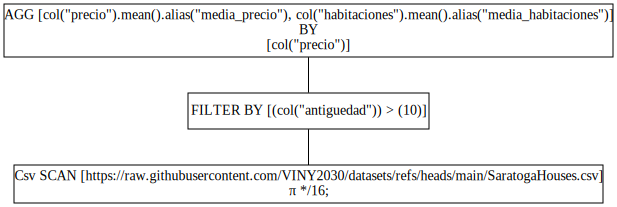

In [106]:
# Call show_graph before collect()
query.show_graph(optimized=False)

# then if you want a pandas DataFrame use collect()
result = query.collect()

In [107]:
# then if you want a pandas DataFrame use collect()
result = query.collect()

In [108]:
result

precio,media_precio,media_habitaciones
i64,f64,f64
146500,146500.0,5.666667
86000,86000.0,5.5
106000,106000.0,8.0
240000,240000.0,7.5
159400,159400.0,5.0
…,…,…
157000,157000.0,5.75
112200,112200.0,4.0
159000,159000.0,6.666667


###La visualización del plan de consulta debe leerse de abajo hacia arriba. Expliquemos como leer esta salida:

##Cada rectángulo corresponde a una etapa del plan de consulta
##El sigma significa SELECCIÓN e indica cualquier condición de filtro
##El pi significa PROYECCIÓN e indica la elección de un subconjunto de columnas

# Imprimir el plan de consulta
#También podemos imprimir el plan no optimizado con explain(optimized=False).

In [109]:
print(query.explain(optimized=False))  #3 se imprime el plan del lazy frame

AGGREGATE
	[col("precio").mean().alias("media_precio"), col("habitaciones").mean().alias("media_habitaciones")] BY [col("precio")] FROM
  FILTER [(col("antiguedad")) > (10)] FROM
    Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
    PROJECT */16 COLUMNS


##Imprimamos el plan de consulta optimizado.

In [112]:
print(query.explain())

AGGREGATE
	[col("precio").mean().alias("media_precio"), col("habitaciones").mean().alias("media_habitaciones")] BY [col("precio")] FROM
  Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
  PROJECT 3/16 COLUMNS
  SELECTION: [(col("antiguedad")) > (10)]



# **<font color="#07a8ed">Ejecucion de una consulta en la  API lazy**

In [113]:
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Usar pl.col para su consistencia
)

##Podemos ejecutar nuestra consulta en el conjunto de datos completo llamando al método .collect en la consulta.

In [36]:
query.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,false,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,false,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,false,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [37]:
query

###Con el método por defecto collect, Polars procesa todos sus datos como un solo lote. Esto significa que todos los datos deben caber en la memoria disponible en el punto de mayor uso de la memoria en la consulta.


# **<font color="#07a8ed">Ejecución en datos más grandes que la memoria**


##Si nuestros datos requieren más memoria de la que tenemos disponible, es posible que Polars pueda procesar los datos en lotes (batches en inglés) utilizando el modo de streaming. Para usar el modo streaming simplemente pasamos el argumento streaming=True a collect.

In [115]:
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col aqui para su consistencia
    .collect(streaming=True)
)

In [116]:
query

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,false,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,false,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,false,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""



# **<font color="#07a8ed">Ejecución en un conjunto de datos parcial**

###Mientras escribimos, optimizamos o verificamos nuestra consulta en un conjunto de datos grande, consultar todos los datos disponibles puede provocar un proceso de desarrollo lento.

##En su lugar, podemos ejecutar la consulta con el método .fetch. El método .fetch toma un parámetro n_rows e intenta "obtener" (fetch) esa cantidad de filas en la fuente de datos. Sin embargo, no se puede garantizar el número de filas, ya que la API lazy no cuenta cuántas filas hay en cada etapa de la consulta.

In [118]:
query = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
    .with_columns(antiguedad=(pl.col('antiguedad') > 60))
    .filter(pl.col('precio') > 50000) # Use pl.col aqui para su consistencia

)
query.fetch(n_rows=20)  ## toma las 20 filas pero señala que use el lazy frame

<ipython-input-118-d1442a154d2c>:7: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  query.fetch(n_rows=20)  ## toma las 20 filas pero señala que use el lazy frame


,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15,89900,0.0,true,2500,936,57,3,1.0,4,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
16,155000,0.13,false,300,1300,41,3,1.5,7,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
17,253750,2.0,false,49800,2816,71,4,2.5,12,"""hot air""","""gas""","""none""","""No""","""No""","""Yes"""


In [120]:
query.collect().head(20)  ## alternativa al fetch

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,bool,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,false,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,false,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,true,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,false,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,false,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15,89900,0.0,true,2500,936,57,3,1.0,4,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
16,155000,0.13,false,300,1300,41,3,1.5,7,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
17,253750,2.0,false,49800,2816,71,4,2.5,12,"""hot air""","""gas""","""none""","""No""","""No""","""Yes"""



# **<font color="#07a8ed">Lazy Frames Agregaciones**

In [121]:
import polars as pl

lf = pl.LazyFrame(
    {
        'id': [1,2,3],
        'nombre': ['Jose', 'Ana', 'Rosa']
    }
)

lf

##Si tratamos de mostar el LazyFrame como se muestra en la celda previa lo que obtendremos es una representación visual del plan de ejecución.

###Por tanto si deseamos mostrar el LazyFrame debemos convertirlo a un DataFrame con la función collect y luego mostrarlo.

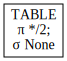

In [122]:
lf.show_graph()  ## plan de ejecucion del lazy frame

In [123]:
lf.collect()  ## leer el lazy frame con el metodo collect()

id,nombre
i64,str
1,"""Jose"""
2,"""Ana"""
3,"""Rosa"""


# **null_count**
###Esta función retorna el conteo de valores nulos de cada columna.

In [218]:
df = (
    pl.scan_csv('https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv')
)
df

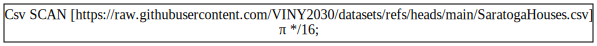

In [125]:
df.show_graph() ## se muestra el plan del lazy frame

In [128]:
df.collect()  ## leer el lazy frame a traves del metodo collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [129]:
df.null_count().collect()  ## nulos a traves de collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **sum**
###Esta función devuelve la suma de los valores de cada columna del DataFrame.

In [132]:
df.sum().collect()  ## funcion suma  de los valores de las  columnas del dataset menos las string

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1492128,366278467,864.37,48239,59714820,3032598,96021,5451,3283.5,12168,null,null,null,null,null,null


# ***min, max y mean***
##Esta funciones se comportan igual en un DataFrame o un LazyFrame.

In [134]:
df.collect().min() ## funcion de minimo de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,5000,0.0,0,200,616,20,1,0.0,2,"""electric""","""electric""","""none""","""No""","""No""","""No"""


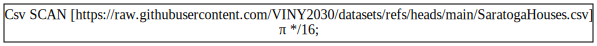

In [135]:
df.show_graph()

In [136]:
df.min().collect()  ## alternativa de la funcion de minimo de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,5000,0.0,0,200,616,20,1,0.0,2,"""electric""","""electric""","""none""","""No""","""No""","""No"""


In [137]:
df.max().collect()  ### funcion maximo de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1727,775000,12.2,225,412600,5228,82,7,4.5,12,"""hot water/steam""","""oil""","""septic""","""Yes""","""Yes""","""Yes"""


In [138]:
df.mean().collect()  ## media de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
863.5,211966.70544,0.500214,27.916088,34557.1875,1754.975694,55.567708,3.154514,1.900174,7.041667,null,null,null,null,null,null


In [140]:
df.std().collect()  ## desviacion estandard de las columnas numericas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str,str
498.974949,98441.391015,0.69868,29.209988,35021.168056,619.935553,10.333581,0.817351,0.658352,2.316453,null,null,null,null,null,null



# **<font color="#07a8ed">Lazy Frames Atributos**

# columns
##Esta función realiza exactamente la misma función en un DataFrame que en un LazyFrame, devuelve una lista con los nombres de columna.

In [141]:
df.columns  ## columnas del lazy frame

<ipython-input-141-17b786a3e796>:1: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  df.columns  ## columnas del lazy frame


['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

In [142]:
df.collect_schema().names()  ## nombre de las columnas

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

# **dtypes**
##Esta función devuelve los tipos de datos de las columnas de un LazyFrame.

In [143]:
df.dtypes  ## listado del tipo de datos de las columnas

<ipython-input-143-92bb4a27dd17>:1: PerformanceWarning: Determining the data types of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().dtypes()` to get the data types without this warning.
  df.dtypes  ## listado del tipo de datos de las columnas


[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

In [144]:
df.collect_schema().dtypes()  ## alternativa de tipos de datos

[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

# **schema**
##Esta función devuelve el schema de un LazyFrame en un diccionario donde las llaves son los nombres de columnas y los valores son los tipos de datos de esa columna.

In [145]:
df.collect_schema()  ## funcion de nombre de columna y tipo de datos

Schema([('', Int64),
        ('precio', Int64),
        ('metros_totales', Float64),
        ('antiguedad', Int64),
        ('precio_terreno', Int64),
        ('metros_habitables', Int64),
        ('universitarios', Int64),
        ('dormitorios', Int64),
        ('baños', Float64),
        ('habitaciones', Int64),
        ('calefaccion', String),
        ('consumo_calefacion', String),
        ('desague', String),
        ('vistas_lago', String),
        ('nueva_construccion', String),
        ('aire_acondicionado', String)])

In [146]:
df.schema.get('precio')  ## conseguir tipo de dato de la columna precio

<ipython-input-146-5e42e88a83ba>:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  df.schema.get('precio')  ## conseguir tipo de dato de la columna precio


Int64

# **width**
##Esta función devuelve el número de columnas de un LazyFrame.

In [147]:
df.width  ### Esta función devuelve el número de columnas de un LazyFrame.

<ipython-input-147-446702bef447>:1: PerformanceWarning: Determining the width of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().len()` to get the width without this warning.
  df.width  ### Esta función devuelve el número de columnas de un LazyFrame.


16

In [149]:
df.collect_schema().len()  ###alternativa devuelve el número de columnas de un LazyFrame.

16


# **<font color="#07a8ed">Lazy Frames Group_by**

# **Varias agregaciones**
##Para realizar agregaciones sobre un LazyFrame primero debemos realizar un agrupado con la función group_by y luego utilizar la función agg.

##Las agregaciones funcionan de de la misma forma a como lo estudiamos en la lección de GroupBy de los DataFrame de Polars.

In [151]:
df.collect()  ## detalle de las columnas del lazy frame

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [152]:
df.group_by('precio').agg(
    pl.col('antiguedad').mean().alias('media_antiguedad'),## media columna antiguedad
    pl.col('antiguedad').min().alias('min_antiguedad'),
    pl.col('antiguedad').max().alias('max_antiguedad'),
    pl.count('dormitorios').alias('conteo_dormitorios'), #
    pl.sum('antiguedad').alias('suma_antiguedad'), # suma de columna antiguedad
    pl.first('antiguedad').alias('primer_antiguedad'), ## primer valor
    pl.last('antiguedad').alias('ultimo_antiguedad'), ## ultimo valor
    (pl.last('antiguedad') - pl.first('antiguedad')).alias('diferencia_antiguedad') # ultimo valor  menos el primero
)

In [155]:
df.collect().head(3)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [153]:
df.group_by('precio').agg(
    pl.col('antiguedad').mean().alias('media_antiguedad'),
    pl.col('antiguedad').min().alias('min_antiguedad'),
    pl.col('antiguedad').max().alias('max_antiguedad'),
    pl.count('dormitorios').alias('conteo_dormitorios'), #
    pl.sum('antiguedad').alias('suma_antiguedad'), #
    pl.first('antiguedad').alias('primer_antiguedad'), #
    pl.last('antiguedad').alias('ultimo_antiguedad'), #
    (pl.last('antiguedad') - pl.first('antiguedad')).alias('diferencia_antiguedad') #
).collect() ## utilizo el metodo collect ´para ver los detalles del dataframe

precio,media_antiguedad,min_antiguedad,max_antiguedad,conteo_dormitorios,suma_antiguedad,primer_antiguedad,ultimo_antiguedad,diferencia_antiguedad
i64,f64,i64,i64,u32,i64,i64,i64,i64
457000,53.0,53,53,1,53,53,53,0
194900,9.0,9,9,1,9,9,9,0
78000,81.0,77,85,2,162,77,85,8
181115,0.0,0,0,1,0,0,0,0
218000,51.75,16,142,4,207,142,31,-111
…,…,…,…,…,…,…,…,…
409790,1.0,1,1,1,1,1,1,0
150450,21.0,21,21,1,21,21,21,0
262000,10.6,0,35,5,53,5,35,30


In [66]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""



# **<font color="#07a8ed">Lazy Frames-Manipulacion y Seleccion**

##Debemos tener en cuenta que estas operaciones funcionan de la misma forma a como lo hacen con los DataFrame con algunas excepciones.

# **botton_k**
##Retorna los k elementos más pequeños del DataFrame. Le podemos indicar la cantidad de elementos que deseamos mostrar y por cual columna ordenar para obtener el resultado.

In [156]:
# se ordena por la columna de antiguedad en forma descendente los nulos al final
result = df.sort(by=['antiguedad'], descending=[True], nulls_last=True)
result

In [157]:
result.collect()  ## observamos el dataset ordenado por antiguedad

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
62,82800,0.11,225,3900,1483,52,3,1.0,7,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
33,227000,1.8,201,25500,1876,52,3,2.5,5,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
140,135000,3.0,178,44500,3020,41,4,2.5,12,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
1685,422680,0.16,176,46200,4486,51,6,4.0,12,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
980,154000,0.1,174,32800,1364,63,5,1.0,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1468,295925,0.56,0,108900,2134,40,4,2.5,9,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""No"""
1484,355063,0.36,0,13000,2256,64,4,2.5,8,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
1588,365000,0.56,0,37900,2950,64,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **drop**
##Elimina la(s) columna(s) seleccionada(s).

In [158]:
df.drop('nueva_construccion').collect()  ## dropeamos columna 'nueva_construccion'

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No"""


In [159]:
df.collect_schema().names()  ## nombres de columnas del df

['',
 'precio',
 'metros_totales',
 'antiguedad',
 'precio_terreno',
 'metros_habitables',
 'universitarios',
 'dormitorios',
 'baños',
 'habitaciones',
 'calefaccion',
 'consumo_calefacion',
 'desague',
 'vistas_lago',
 'nueva_construccion',
 'aire_acondicionado']

# **Filtrar un DataFrame**

In [161]:
df.filter(pl.col('precio') > 10000).filter((pl.col('antiguedad')>10) & (pl.col('precio')>50000)).select(  ## filtro precio mayor a 50000, antiguedad mayor a 10
    [  ## agrego columnas con medias, conteo, suma, minimo, maximo, primer valor ultimo valor segun el filtro
        pl.col('precio').mean().alias('precio_mean'),
        pl.col('dormitorios').count().alias('conteo_dormitorios'),
        pl.col('antiguedad').sum().alias('suma_antiguedad'),
        pl.col('antiguedad').min().alias('min_antiguedad'),
        pl.col('antiguedad').max().alias('max_antiguedad'),
        pl.col('antiguedad').first().alias('primer_antiguedad'),
        pl.col('antiguedad').last().alias('ultimo_antiguedad'),
        (pl.col('antiguedad').last() - pl.col('antiguedad').first()).alias('diferencia_antiguedad')
    ]
).collect()


precio_mean,conteo_dormitorios,suma_antiguedad,min_antiguedad,max_antiguedad,primer_antiguedad,ultimo_antiguedad,diferencia_antiguedad
f64,u32,i64,i64,i64,i64,i64,i64
193701.342899,1359,46559,11,225,42,86,44


## ***with_context***
##Esta función agrega un contexto externo al gráfico de cálculo. Esto permite que las expresiones también accedan a columnas de DataFrames que no forman parte de este.

In [165]:
tarjetas_lz = pl.LazyFrame({'tarjeta': ['bronce', 'plata', 'oro']})

descuentos_lz = pl.LazyFrame({'descuento': [10, 20, 30]})


In [166]:
tarjetas_lz.collect()

tarjeta
str
"""bronce"""
"""plata"""
"""oro"""


In [167]:
descuentos_lz.collect()

descuento
i64
10
20
30


In [168]:
## es un metodo de concat de with context
tarjetas_lz.with_context(descuentos_lz).select(
    pl.col('tarjeta'), # Use pl.col
    pl.col('descuento') # Use pl.col
).collect()

<ipython-input-168-9333653c1efe>:2: DeprecationWarning: `LazyFrame.with_context` is deprecated. Use `pl.concat(..., how='horizontal')` instead.
  tarjetas_lz.with_context(descuentos_lz).select(


tarjeta,descuento
str,i64
"""bronce""",10
"""plata""",20
"""oro""",30


# **slice**
##Con esta función podemos obtener una porción o lo que en inglés se conoce como un slice de un DataFrame.

In [172]:
df.slice(1,10).collect()  ## porcion del dataframe ( desde , hasta fila inclusive)

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
5,120000,0.68,31,14000,1152,22,4,1.0,8,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
6,153000,0.4,33,23300,2752,51,4,1.5,8,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
7,170000,1.21,23,14600,1662,35,4,1.5,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
8,90000,0.83,36,22200,1632,51,3,1.5,8,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
9,122900,1.94,4,21200,1416,44,3,1.5,6,"""hot air""","""gas""","""none""","""No""","""No""","""No"""


# **sort**
##Esta función ordena el LazyFrame por la(s) columna(s) proporcionadas

In [173]:
df.sort('antiguedad', descending=True, nulls_last=True).collect()  ## ordenar en forma descencente con los nulos al final

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
62,82800,0.11,225,3900,1483,52,3,1.0,7,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
33,227000,1.8,201,25500,1876,52,3,2.5,5,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
140,135000,3.0,178,44500,3020,41,4,2.5,12,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
1685,422680,0.16,176,46200,4486,51,6,4.0,12,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
980,154000,0.1,174,32800,1364,63,5,1.0,9,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1468,295925,0.56,0,108900,2134,40,4,2.5,9,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""No"""
1484,355063,0.36,0,13000,2256,64,4,2.5,8,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
1588,365000,0.56,0,37900,2950,64,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **gather_every**
##Toma cada enésima fila del LazyFrame y regresa un nuevo LazyFrame. El primer parámetro estable cada cuantas filas queremos tomar la siguiente fila y el parámetro offset establece desde que posición queremos iniciar a tomar las filas.

In [175]:
df.gather_every(5, 100).collect() ##  iniciamos desde la fila 100 agrupa cada 5 filas

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
100,110000,0.59,10,3100,936,44,3,1.0,6,"""hot air""","""gas""","""septic""","""No""","""No""","""Yes"""
105,225000,2.37,8,3300,1784,44,3,2.0,6,"""hot water/steam""","""oil""","""septic""","""No""","""No""","""No"""
110,112500,0.72,43,4600,1232,44,3,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
115,192000,0.82,0,5000,1880,44,3,2.5,9,"""hot air""","""gas""","""septic""","""No""","""Yes""","""Yes"""
120,75000,1.0,45,8000,1008,44,3,1.0,7,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1705,221450,0.36,121,33000,2699,61,6,1.0,12,"""hot air""","""oil""","""septic""","""No""","""No""","""No"""
1710,388000,0.77,9,74400,2762,61,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""
1715,70000,1.34,34,36700,1313,61,2,1.5,3,"""electric""","""electric""","""septic""","""No""","""No""","""No"""


# **shift**
##Esta función cambia los valores según el número dado de índices. En la práctica lo podemos ver como un desplazamiento de las filas del LazyFrame.

In [176]:
df.shift(3).collect()  ## desplazamiento de las filas del dataset

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1720,436023,0.41,5,43400,2718,61,4,2.5,12,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""Yes"""
1721,319900,0.58,42,31400,2464,61,4,2.5,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1722,249000,0.43,41,45800,2426,61,4,2.0,7,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


In [177]:
df.shift(3, fill_value='prueba').collect()  ## se rellena las filas con un valor

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba""","""prueba"""
"""0""","""132500""","""0.09""","""42""","""50000""","""906""","""35""","""2""","""1.0""","""5""","""electric""","""electric""","""septic""","""No""","""No""","""No"""
"""1""","""181115""","""0.92""","""0""","""22300""","""1953""","""51""","""3""","""2.5""","""6""","""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1720""","""436023""","""0.41""","""5""","""43400""","""2718""","""61""","""4""","""2.5""","""12""","""hot air""","""gas""","""public/commercial""","""No""","""No""","""Yes"""
"""1721""","""319900""","""0.58""","""42""","""31400""","""2464""","""61""","""4""","""2.5""","""8""","""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
"""1722""","""249000""","""0.43""","""41""","""45800""","""2426""","""61""","""4""","""2.0""","""7""","""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""


# **inspect**
##Esta función inspecciona un nodo en el gráfico de cálculo. Con ella podemos imprimir el valor que evalúa este nodo en el gráfico de cálculo.

In [178]:
query_inspect = (
    df.with_columns(precio=(pl.col('precio') > 60000))
    .inspect()
    .select(  ## selecciono las columnas de antiguedad y precio ´previo filtrado precio mayor a 60000
        pl.col('antiguedad'), #
        pl.col('precio')     #
    )
)

In [180]:
query_inspect.collect()  ## produce en la columna precio una columna booleana

shape: (1_728, 2)
┌────────┬────────────┐
│ precio ┆ antiguedad │
│ ---    ┆ ---        │
│ bool   ┆ i64        │
╞════════╪════════════╡
│ true   ┆ 42         │
│ true   ┆ 0          │
│ true   ┆ 133        │
│ true   ┆ 13         │
│ true   ┆ 0          │
│ …      ┆ …          │
│ true   ┆ 32         │
│ true   ┆ 37         │
│ true   ┆ 9          │
│ true   ┆ 48         │
│ true   ┆ 86         │
└────────┴────────────┘


antiguedad,precio
i64,bool
42,true
0,true
133,true
13,true
0,true
…,…
32,true
37,true
9,true


In [181]:
print(query_inspect.explain())  ## explica en inspect

simple π 2/2 ["antiguedad", "precio"]
  OPAQUE_PYTHON
     WITH_COLUMNS:
     [[(col("precio")) > (60000)].alias("precio")] 
      Csv SCAN [https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv]
      PROJECT 2/16 COLUMNS



# **<font color="#07a8ed">Lazy Frames-Miscelanea**

# **map_batches**
##Esta función permite aplicar una función personalizada a un LazyFrame. Es importante que la función personalizada devuelva un DataFrame de Polars.

In [185]:
(
 df.select(
  pl.col('antiguedad'),
  pl.col('precio')
 )
 ###.map_batches(lambda c: (c / 60).cast(pl.Int64)) # Cast to pl.Int64
 #
).collect()

antiguedad,precio
i64,i64
42,132500
0,181115
133,109000
13,155000
0,86060
…,…
32,289000
37,285000
9,194900


In [186]:
(
 df.select(
  pl.col('antiguedad'),
  pl.col('precio')
 )
 .map_batches(lambda c: (c / 60).cast(pl.Int64)) # aplica lambda en las dos columna resultado entero
 #
).collect()

antiguedad,precio
i64,i64
0,2208
0,3018
2,1816
0,2583
0,1434
…,…
0,4816
0,4750
0,3248


# pipe
##Esta función ofrece una forma estructurada de aplicar una secuencia de funciones definidas por el usuario.

In [210]:
def extract_number(expr: pl.Expr) -> pl.Expr:  ## funcion para extraer strings
    """Extract the digits from a string."""
    return expr.str.extract(r"\d+", 0).cast(pl.Int64)

def scale_negative_even(expr: pl.Expr, *, n: int = 1) -> pl.Expr:
    """Set even numbers negative, and scale by a user-supplied value."""
    expr = pl.when(expr % 2 == 0).then(-expr).otherwise(expr)
    return expr * n

In [215]:
df1 = pl.DataFrame({"val": ["a: 1", "b: 2", "c: 3", "d: 4"]})
df1.with_columns(
    udfs=(
        pl.col("val").pipe(extract_number).pipe(scale_negative_even, n=5)  ## creacion de columna con pipe y valor de funcion scale_negative_even
    ),
)

val,udfs
str,i64
"""a: 1""",5
"""b: 2""",-10
"""c: 3""",15
"""d: 4""",-20


In [84]:
df.collect_schema().dtypes()

[Int64,
 Int64,
 Float64,
 Int64,
 Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Int64,
 String,
 String,
 String,
 String,
 String,
 String]

# **profile**
##Esta función perfila un LazyFrame, es decir, ejecutará la consulta y devolverá una tupla que contiene el DataFrame materializado y un DataFrame que contiene información de perfil de cada nodo que se ejecuta. Las unidades de los tiempos son microsegundos.

##Con el parámetro show_plot=True mostraremos un diagrama de Gantt del resultado del perfilado.

In [221]:
df.collect()

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,str,str
0,132500,0.09,42,50000,906,35,2,1.0,5,"""electric""","""electric""","""septic""","""No""","""No""","""No"""
1,181115,0.92,0,22300,1953,51,3,2.5,6,"""hot water/steam""","""gas""","""septic""","""No""","""No""","""No"""
2,109000,0.19,133,7300,1944,51,4,1.0,8,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
3,155000,0.41,13,18700,1944,51,3,1.5,5,"""hot air""","""gas""","""septic""","""No""","""No""","""No"""
4,86060,0.11,0,15000,840,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""Yes""","""Yes"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1723,289000,0.38,32,24200,2310,61,5,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1724,285000,0.94,37,36200,2564,61,4,2.5,11,"""hot water/steam""","""gas""","""public/commercial""","""No""","""No""","""No"""
1725,194900,0.39,9,20400,1099,51,2,1.0,3,"""hot air""","""gas""","""public/commercial""","""No""","""No""","""No"""


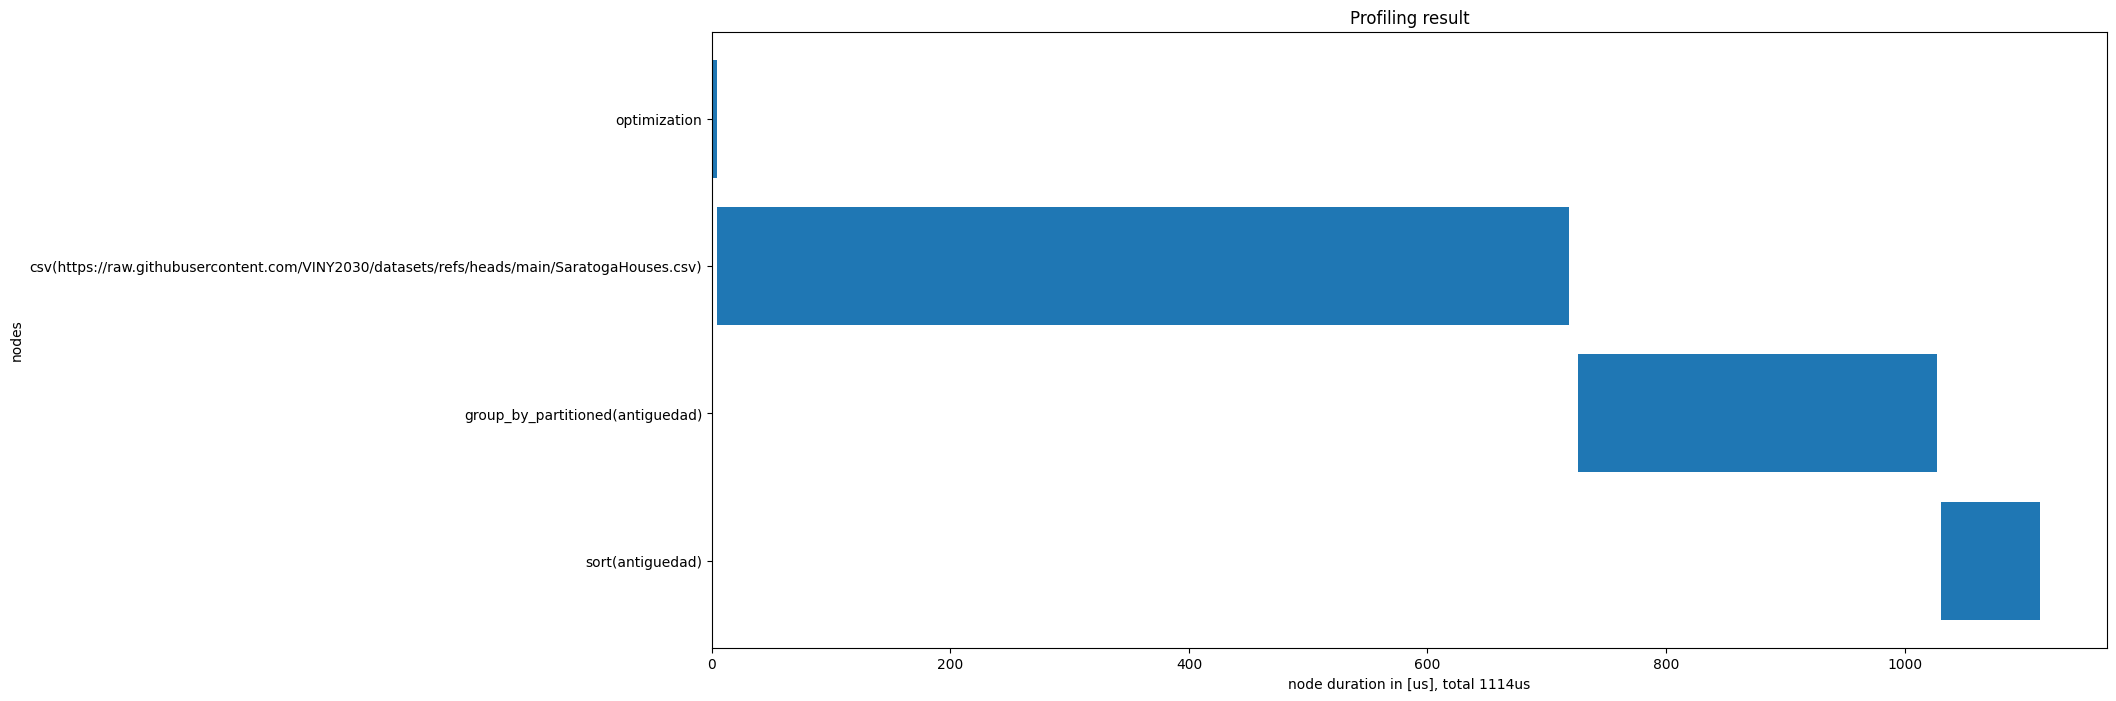

(shape: (136, 2)
 ┌────────────┬──────────────┐
 │ antiguedad ┆ suma_precios │
 │ ---        ┆ ---          │
 │ i64        ┆ i64          │
 ╞════════════╪══════════════╡
 │ 225        ┆ 82800        │
 │ 201        ┆ 227000       │
 │ 178        ┆ 135000       │
 │ 176        ┆ 422680       │
 │ 174        ┆ 154000       │
 │ …          ┆ …            │
 │ 4          ┆ 6271000      │
 │ 3          ┆ 9727250      │
 │ 2          ┆ 5642600      │
 │ 1          ┆ 22752834     │
 │ 0          ┆ 22221338     │
 └────────────┴──────────────┘,
 shape: (4, 3)
 ┌─────────────────────────────────┬───────┬──────┐
 │ node                            ┆ start ┆ end  │
 │ ---                             ┆ ---   ┆ ---  │
 │ str                             ┆ u64   ┆ u64  │
 ╞═════════════════════════════════╪═══════╪══════╡
 │ optimization                    ┆ 0     ┆ 4    │
 │ csv(https://raw.githubusercont… ┆ 4     ┆ 719  │
 │ group_by_partitioned(antigueda… ┆ 726   ┆ 1027 │
 │ sort(antiguedad)     

In [223]:
from polars import col

query_df = df.group_by('antiguedad').agg(  ## agrupe pór antiguedad
    suma_precios=col('precio').sum() ## agregue suma de precios y ordene por antiguedad
).sort('antiguedad', descending=True)

query_df.profile(show_plot=True)  ## profile duracion de los procesos en microsegundos

# **<font color="#07a8ed">Lazy Frame con  Gran Marco de Datos Perezoso-100 millones de registros?**

In [3]:
!pip install polars -U

  Using cached polars-1.12.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached polars-1.12.0-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
ERROR: Operation cancelled by user


In [4]:
!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [5]:
import polars as pl

In [6]:
import numpy as np

In [7]:
%%time
np.random.seed(0)

num_rows = 100_000_000
num_columns = 6

# Crear un marco de datos con datos aleatorios
# Cambiado: pase los datos y los nombres de la columna utilizando el argumento del esquema
data = np.random.randint(0, 100, size=(num_rows, num_columns))
schema = {f'Column_{i}': pl.Int64 for i in range(1, num_columns + 1)}
df_polars = pl.LazyFrame(data, schema=schema)
df_polars

CPU times: user 7.99 s, sys: 2.49 s, total: 10.5 s
Wall time: 11 s


In [8]:
%time
df_polars.collect()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


Column_1,Column_2,Column_3,Column_4,Column_5,Column_6
i64,i64,i64,i64,i64,i64
44,47,64,67,67,9
83,21,36,87,70,88
88,12,58,65,39,87
46,88,81,37,25,77
72,9,20,80,69,79
…,…,…,…,…,…
13,6,67,74,86,84
62,63,75,85,8,15
96,45,61,51,44,59
